In [2]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date']= pd.to_datetime(df['job_posted_date'])



d:\Program Files\anaconda\envs\python_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df.pivot_table(values = 'salary_year_avg' , index = 'job_title_short',columns = 'job_country', aggfunc='median')

job_country,Albania,Algeria,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bangladesh,Belarus,...,Uganda,Ukraine,United Arab Emirates,United Kingdom,United States,Uruguay,Uzbekistan,Vietnam,Zambia,Zimbabwe
job_title_short,,,,,,,,,,,,,,,,,,,,,
Business Analyst,NaN,NaN,71100.00,NaN,70000.0,NaN,NaN,NaN,16500.0,NaN,...,NaN,72900.0,NaN,56700.0,90000.0,NaN,NaN,79200.0,NaN,NaN
Cloud Engineer,NaN,NaN,197500.00,NaN,110000.0,NaN,NaN,NaN,NaN,NaN,...,NaN,89100.0,NaN,NaN,116100.0,NaN,NaN,NaN,NaN,NaN
Data Analyst,49950.00,44100.0,92771.75,100500.0,109500.0,80850.00,NaN,NaN,NaN,400000.0,...,69300.0,72900.0,98500.0,87750.0,90000.0,100500.0,NaN,75550.0,NaN,63000.0
Data Engineer,NaN,45000.0,96773.00,48750.0,106712.5,147500.00,NaN,211000.0,97444.0,NaN,...,NaN,89100.0,97528.0,110000.0,125000.0,NaN,NaN,96773.0,NaN,NaN
Data Scientist,69981.25,NaN,71000.00,NaN,139216.0,71249.75,NaN,NaN,NaN,NaN,...,84200.0,131846.5,166419.5,105300.0,130000.0,NaN,30750.0,70000.0,90670.0,69085.0
Machine Learning Engineer,NaN,NaN,101029.00,87021.0,101029.0,89100.00,NaN,228750.0,69000.0,NaN,...,NaN,89100.0,62850.0,149653.0,150000.0,50000.0,NaN,57600.0,NaN,NaN
Senior Data Analyst,NaN,NaN,NaN,NaN,50640.0,89100.00,NaN,NaN,NaN,NaN,...,NaN,NaN,105837.5,111175.0,110000.0,NaN,NaN,105837.5,NaN,NaN
Senior Data Engineer,NaN,NaN,147500.00,NaN,147500.0,147500.00,NaN,173500.0,NaN,NaN,...,NaN,96773.0,NaN,147500.0,150000.0,NaN,NaN,147500.0,NaN,NaN
Senior Data Scientist,157500.00,NaN,NaN,NaN,157500.0,80850.00,NaN,NaN,NaN,NaN,...,NaN,157500.0,72000.0,157500.0,155000.0,57500.0,NaN,79200.0,NaN,NaN


In [4]:
df.groupby('job_title_short').size()

job_title_short
Business Analyst              49063
Cloud Engineer                12331
Data Analyst                 196075
Data Engineer                186241
Data Scientist               172286
Machine Learning Engineer     14080
Senior Data Analyst           29216
Senior Data Engineer          44563
Senior Data Scientist         36957
Software Engineer             44929
dtype: int64

In [19]:
top_countries = df['job_country'].value_counts().head(6).index

In [24]:
df_job_country_salary = df.pivot_table(
values = 'salary_year_avg' , 
index = 'job_title_short',
columns = 'job_country',
aggfunc='median')
df_job_country_salary = df_job_country_salary[top_countries]
df_job_country_salary

job_country,United States,India,United Kingdom,France,Germany,Spain
job_title_short,,,,,,
Business Analyst,90000.0,64800.0,56700.0,89100.0,89100.0,86400.0
Cloud Engineer,116100.0,NaN,NaN,105968.0,89100.0,89100.0
Data Analyst,90000.0,100500.0,87750.0,69175.0,103750.0,91977.0
Data Engineer,125000.0,147500.0,110000.0,98301.5,147500.0,133000.0
Data Scientist,130000.0,114008.0,105300.0,88128.0,131560.0,88128.0
Machine Learning Engineer,150000.0,79200.0,149653.0,80850.0,89100.0,101029.0
Senior Data Analyst,110000.0,111175.0,111175.0,111175.0,111175.0,111175.0
Senior Data Engineer,150000.0,147500.0,147500.0,147500.0,147500.0,147500.0
Senior Data Scientist,155000.0,149653.0,157500.0,157500.0,157500.0,157500.0


<Axes: xlabel='job_title_short'>

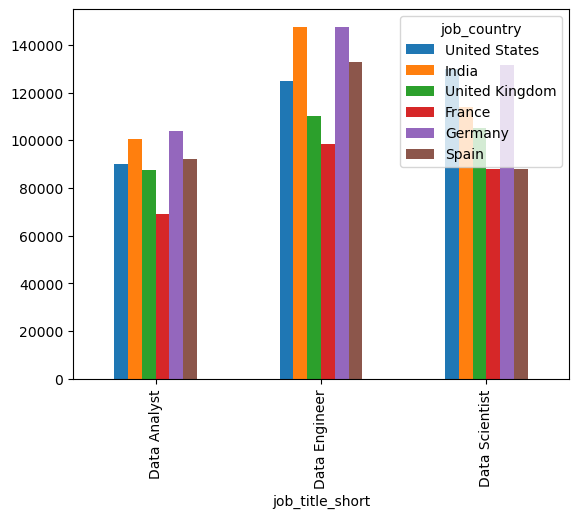

In [30]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_job_country_salary_filtered = df_job_country_salary.loc[job_titles]

df_job_country_salary_filtered.plot(kind='bar')
